In [14]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import operator
#Train et test
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from functools import partial
import time 
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler # for data standardization
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # to encode categorical variables
from sklearn.tree import DecisionTreeClassifier # for decision tree models

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # for LDA analysis



## T-SNE

In [10]:

# data_B =pd.read_csv('/home/sid2020-7/Bureau/DATA1/Donnees_v1.csv')
# data_B['TAUX_LECTURE_MS_6M']=data_B['TAUX_LECTURE_MS_6M'].str.rstrip('%').astype('float') / 100.0
# data_B['TAUX_LECTURE_PAP_6M']=data_B['TAUX_LECTURE_PAP_6M'].str.rstrip('%').astype('float') / 100.0
# data_B['TAUX_LECTURE_EMAIL_6M']=data_B['TAUX_LECTURE_EMAIL_6M'].str.rstrip('%').astype('float') / 100.0

ech_test = data_B.sample(int(len(data_B) * 0.001), random_state=42)
ech_train = data_B.drop(ech_test.index)
L=list(data_B.columns)
L.remove('Unnamed: 0')
L.remove('ID')
L.remove('TOP_FRAUDE')
ech_test.drop("Unnamed: 0",axis=1)

features=ech_test[L].astype(float).values
target=ech_test['TOP_FRAUDE'].astype(float).values
features.tolist()
# from __future__ import print_function

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(features)
print('t-SNE Finis! temps: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 849 samples in 0.035s...
[t-SNE] Computed neighbors for 849 samples in 0.553s...
[t-SNE] Computed conditional probabilities for sample 849 / 849
[t-SNE] Mean sigma: 70.378566
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.705406
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
t-SNE Finis! temps: 2.295964002609253 seconds


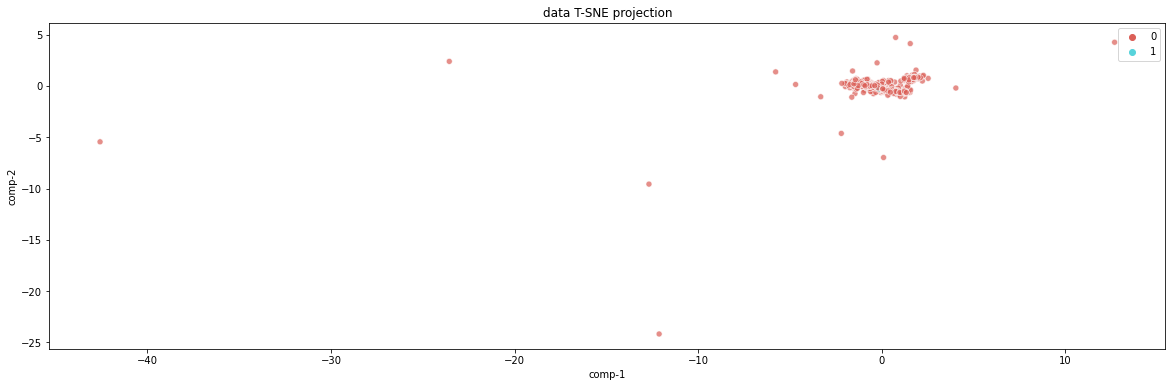

In [11]:
## T-sne
df = pd.DataFrame()
df["target"]  = ech_test['TOP_FRAUDE']
df["comp-1"] = tsne_results[:,0]
df["comp-2"] = tsne_results[:,1]
plt.rcParams["figure.figsize"] = (20,6)
ax = sns.scatterplot(alpha=0.7,x="comp-1", y="comp-2", hue=df.target.tolist(),
                palette=sns.color_palette("hls", 2)
                ,data=df).set(title="data T-SNE projection")
plt.show()

## Locally  Linear  Embedding

In [16]:
lda = LDA(solver='eigen', n_components=2)

# Fit transform the data
X_trans_lda=lda.fit_transform(features,target)

# Print the results
print('*************** LDA Summary ***************')
print('Classes: ', lda.classes_)
print('Priors: ', lda.priors_)
print('Explained variance ratio: ', lda.explained_variance_ratio_)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [1]:

# evaluate lda with logistic regression algorithm for classification

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.825 (0.034)


In [7]:
df =pd.read_csv('/home/sid2020-7/Bureau/DATA1/Donnees_v1.csv')
# Print dataframe
df

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,...,SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV,SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP,SECTEUR_GESTION_SECTEUR NARBONNE,SECTEUR_GESTION_SECTEUR NIMES,SECTEUR_GESTION_SECTEUR NORD,SECTEUR_GESTION_SECTEUR OUEST,SECTEUR_GESTION_SECTEUR SUD,SECTEUR_GESTION_SECTEUR THAU LITTORAL,SECTEUR_GESTION_SECTEUR VALLEE DU RHONE,SECTEUR_GESTION_SVCES SIEGES BR RESEAUX
0,0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849407,849407,835mBEOByTBamgQVgQg771KDA==,1,1,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849408,849408,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849409,849409,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849410,849410,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df['TAUX_LECTURE_MS_6M']=df['TAUX_LECTURE_MS_6M'].str.rstrip('%').astype('float') / 100.0
df['TAUX_LECTURE_PAP_6M']=df['TAUX_LECTURE_PAP_6M'].str.rstrip('%').astype('float') / 100.0
df['TAUX_LECTURE_EMAIL_6M']=df['TAUX_LECTURE_EMAIL_6M'].str.rstrip('%').astype('float') / 100.0
df

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,...,SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV,SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP,SECTEUR_GESTION_SECTEUR NARBONNE,SECTEUR_GESTION_SECTEUR NIMES,SECTEUR_GESTION_SECTEUR NORD,SECTEUR_GESTION_SECTEUR OUEST,SECTEUR_GESTION_SECTEUR SUD,SECTEUR_GESTION_SECTEUR THAU LITTORAL,SECTEUR_GESTION_SECTEUR VALLEE DU RHONE,SECTEUR_GESTION_SVCES SIEGES BR RESEAUX
0,0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849407,849407,835mBEOByTBamgQVgQg771KDA==,1,1,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849408,849408,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849409,849409,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849410,849410,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)